In [18]:
#Seri customer journet ini akan saya bagi menjadi 2 jupyter notebook
1. Data Understanding
Akan menjelaskan point - point seperti:
    - Market sales insight
    - Customer purchasing decission journey
    - Features engineering
2. Recomendations engine
    - Content based method
    - Collaborative filtering method

In [31]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as ts
import matplotlib.pyplot as plt
import sqlalchemy as sa
import seaborn as sns; sns.set(rc={'figure.figsize':(20,9)})
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
import bqplot
import seaborn as sns
from palettable.colorbrewer.diverging import *
path = 'C:\\Users\\ASUS\\Documents\\customers_behaviour\\dataset\\'

In [2]:
# Create SQL Alchemy Engine
engine = sa.create_engine('postgresql://postgres:Jakarta@83@127.0.0.1:5432/behavior')

In [3]:
data1 = pd.read_csv(path + '2019-Oct.csv')
data2 = pd.read_csv(path + '2019-Nov.csv')

In [4]:
data1.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [5]:
data2.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [6]:
data1.shape

(42448764, 9)

In [7]:
data2.shape

(67501979, 9)

In [8]:
frames = [data2, data1]

In [9]:
data = pd.concat(frames)

In [10]:
df = data.copy()

In [11]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [12]:
result = df.empty
print(result)

False


In [13]:
#change event_time formate into datetime
df['event_time'] = pd.to_datetime(df['event_time'], errors='coerce')

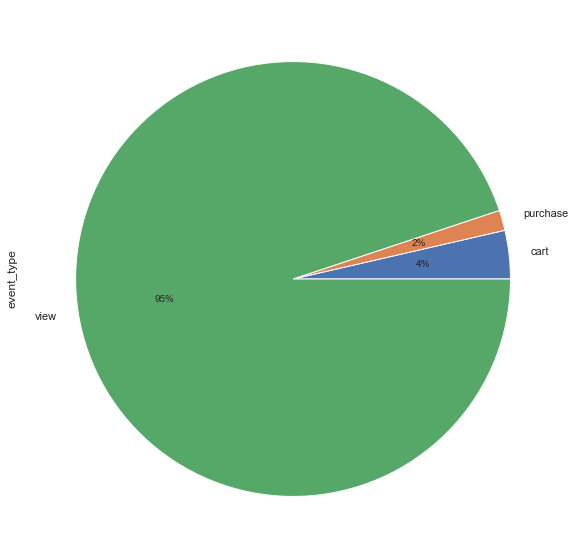

In [14]:
df.groupby('event_type')['event_type'].count().plot(kind='pie', figsize=(30,10), autopct='%1.0f%%')

In [15]:
electronics_smartphone = df.loc[df['category_code'] == 'electronics.smartphone']

In [16]:
electronics_smartphone.shape

(27882231, 9)

Text(0.5, 1.0, 'Sales per day')

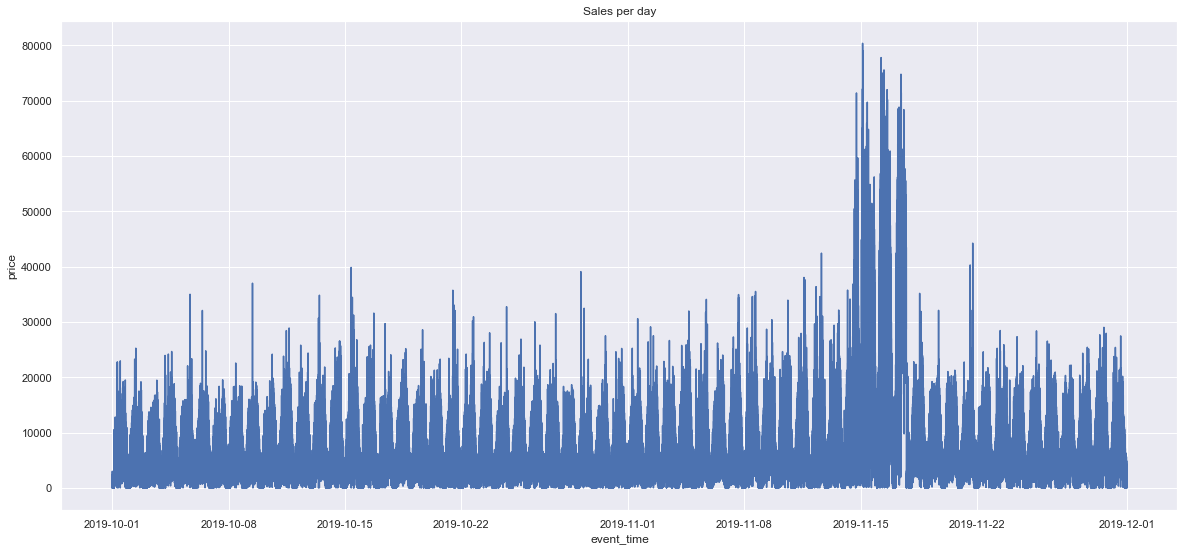

In [19]:
# creating an aggregation
sales_per_purchase_date = df.groupby('event_time', as_index=False).price.sum()
ax = sns.lineplot(x="event_time", y="price", data=sales_per_purchase_date)
ax.set_title('Sales per day')

In [20]:
# creating an aggregation
avg_score_per_category = df.groupby('category_code', as_index=False).agg({'price': ['count', 'mean']})
avg_score_per_category.columns = ['category_code', 'count', 'mean']

# filtering to show only categories with more than 50 reviews
avg_score_per_category = avg_score_per_category[avg_score_per_category['count'] > 50]
avg_score_per_category = avg_score_per_category.sort_values(by='mean', ascending=False)
avg_score_per_category

,category_code,count,mean
97,electronics.camera.photo,31270,804.776620
72,computers.notebook,3318177,719.844794
103,electronics.video.projector,36094,706.464182
114,furniture.living_room.sofa,642066,622.321849
70,computers.desktop,1114744,577.997475
...,...,...,...
53,appliances.personal.scales,160355,21.316260
56,auto.accessories.anti_freeze,3819,19.885910
118,kids.fmcg.diapers,57647,13.066837
86,construction.tools.soldering,4158,12.627340


In [21]:
# creating an aggregation
avg_price_per_brand = df.groupby('brand', as_index=False).agg({'price': ['count', 'mean']})
avg_price_per_brand.columns = ['brand', 'count', 'mean']

# filtering to show only categories with more than 50 reviews
avg_price_per_brand = avg_price_per_brand[avg_price_per_brand['count'] > 50]
avg_price_per_brand = avg_price_per_brand.sort_values(by='mean', ascending=False)
avg_price_per_brand

,brand,count,mean
2986,pinarello,538,2533.238401
2774,nordictrack,431,2522.590000
1975,kessler,106,2372.000000
4222,yjfitness,97,2344.980000
788,climadiff,437,2261.951167
...,...,...,...
1326,fitokosmetik,198,1.299646
2680,narodnyerecepty,126,1.163333
423,beautyvisage,66,1.160000
1626,heinz,123,1.113252


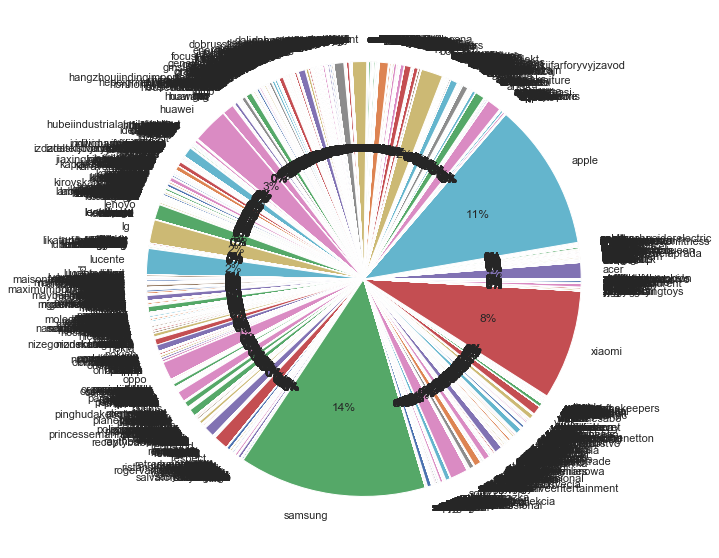

In [22]:
df.groupby('brand')['brand'].count().plot(kind='pie', figsize=(30,10), autopct='%1.0f%%')

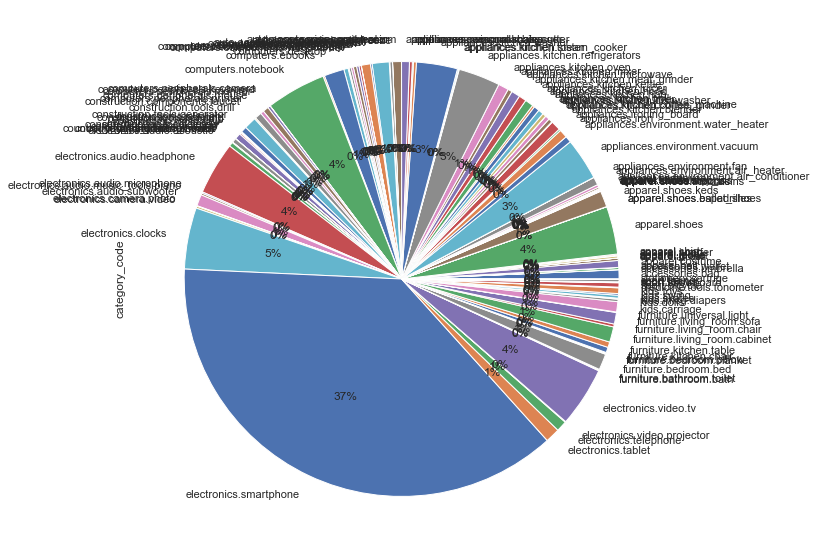

In [23]:
df.groupby('category_code')['category_code'].count().plot(kind='pie', figsize=(30,10), autopct='%1.0f%%')

In [24]:
electronics_smartphone.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
9,2019-11-01 00:00:02+00:00,view,1004258,2053013555631882655,electronics.smartphone,apple,732.07,532647354,d2d3d2c6-631d-489e-9fb5-06f340b85be0
18,2019-11-01 00:00:07+00:00,view,1004566,2053013555631882655,electronics.smartphone,huawei,164.84,566265908,52c2c76c-b79e-4794-86ff-badc76d35f5a
21,2019-11-01 00:00:08+00:00,view,1004708,2053013555631882655,electronics.smartphone,huawei,151.99,566143627,aa610ab3-5c60-4551-8a2b-8c999dddf843


In [25]:
electronics_smartphone.shape

(27882231, 9)

Text(0.5, 1.0, 'Price Distribution')

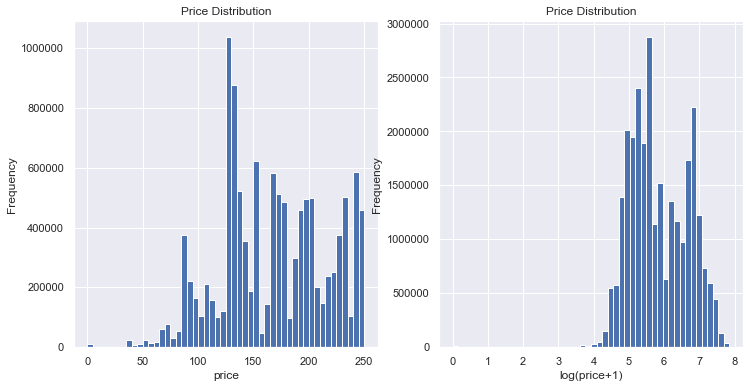

In [26]:
plt.subplot(1, 2, 1)
(electronics_smartphone['price']).plot.hist(bins=50, figsize=(12, 6), edgecolor = 'white', range = [0, 250])
plt.xlabel('price', fontsize=12)
plt.title('Price Distribution', fontsize=12)
plt.subplot(1, 2, 2)
np.log(electronics_smartphone['price']+1).plot.hist(bins=50, figsize=(12,6), edgecolor='white')
plt.xlabel('log(price+1)', fontsize=12)
plt.title('Price Distribution', fontsize=12)

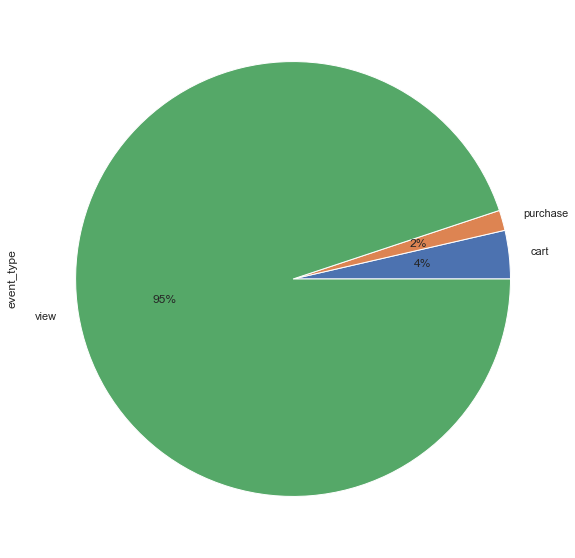

In [27]:
df.groupby('event_type')['event_type'].count().plot(kind='pie', figsize=(30,10), autopct='%1.0f%%')

In [28]:
purchase = df.loc[data['event_type']== 'purchase']

In [29]:
purchase.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
107,2019-11-01 00:00:41+00:00,purchase,13200605,2053013557192163841,furniture.bedroom.bed,NaN,566.30,559368633,d6034fa2-41fb-4ac0-9051-55ea9fc9147a
168,2019-11-01 00:01:04+00:00,purchase,1005161,2053013555631882655,electronics.smartphone,xiaomi,211.92,513351129,e6b7ce9b-1938-4e20-976c-8b4163aea11d
707,2019-11-01 00:04:51+00:00,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,128.42,562958505,0f039697-fedc-40fa-8830-39c1a024351d
811,2019-11-01 00:05:34+00:00,purchase,26401669,2053013563651392361,NaN,lucente,109.66,541854711,c41c44d5-ef9b-41b9-9cd6-8d96dda6e927
939,2019-11-01 00:06:33+00:00,purchase,1801881,2053013554415534427,electronics.video.tv,samsung,488.80,557746614,4d76d6d3-fff5-4880-8327-e9e57b618e0e


In [30]:
cart= df.loc[data['event_type']== 'cart']

In [31]:
view = df.loc[data['event_type']== 'view']

In [32]:
view.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00+00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00+00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01+00:00,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01+00:00,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01+00:00,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [33]:
purchase.shape

(1659788, 9)

In [34]:
cart.shape

(3955446, 9)

In [35]:
view.shape

(104335509, 9)

In [36]:
# creating an aggregation
avg_score_per_category = purchase.groupby('category_code', as_index=False).agg({'price': ['count', 'mean']})
avg_score_per_category.columns = ['category_code', 'count', 'mean']

# filtering to show only categories with more than 50 reviews
avg_score_per_category = avg_score_per_category[avg_score_per_category['count'] > 50]
avg_score_per_category = avg_score_per_category.sort_values(by='mean', ascending=False)
avg_score_per_category

,category_code,count,mean
95,electronics.camera.photo,385,597.450104
71,computers.notebook,34023,577.794932
112,furniture.living_room.sofa,2646,542.064255
101,electronics.video.projector,181,510.634751
25,appliances.environment.air_conditioner,1197,481.861696
...,...,...,...
24,apparel.underwear,181,20.896740
52,appliances.personal.scales,2909,18.431389
27,appliances.environment.fan,59,18.406610
126,stationery.cartrige,325,16.122646


C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\relational.py:792: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)


Text(0.5, 1.0, 'Sales per day')

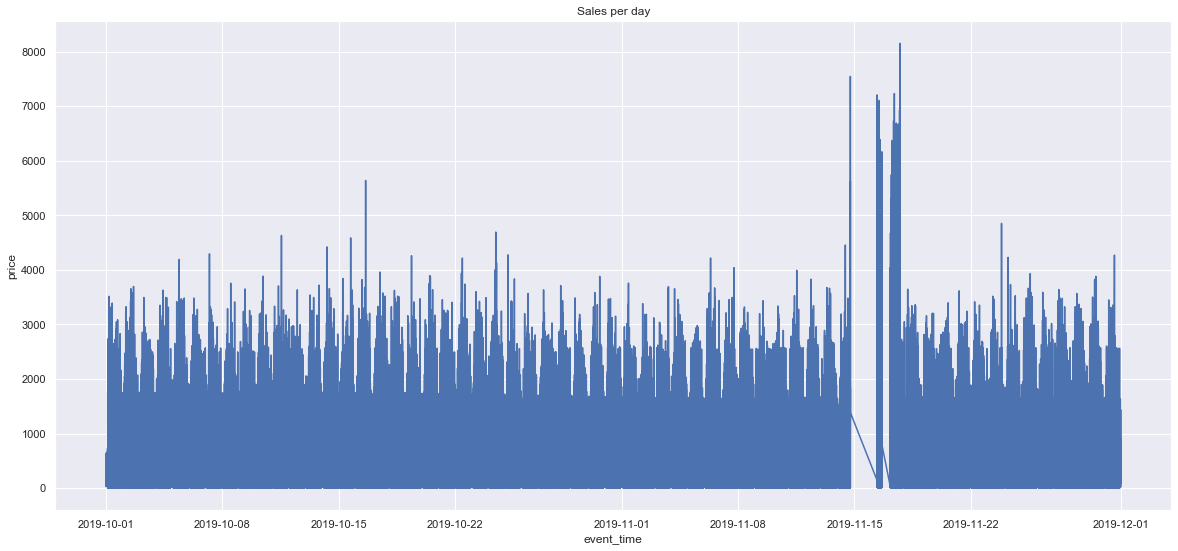

In [37]:
# creating an aggregation
sales_per_purchase_date = purchase.groupby('event_time', as_index=False).price.sum()
ax = sns.lineplot(x="event_time", y="price", data=sales_per_purchase_date)
ax.set_title('Sales per day')

Text(0.5, 1.0, 'Sales per day')

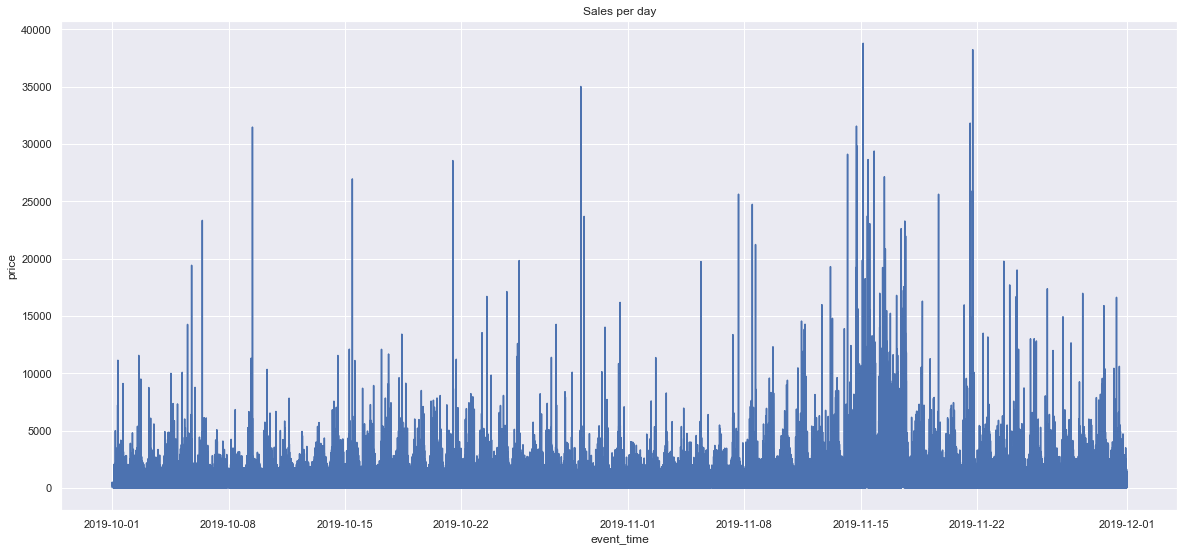

In [38]:
# creating an aggregation
sales_per_purchase_date = cart.groupby('event_time', as_index=False).price.sum()
ax = sns.lineplot(x="event_time", y="price", data=sales_per_purchase_date)
ax.set_title('Sales per day')

Text(0.5, 1.0, 'Sales per day')

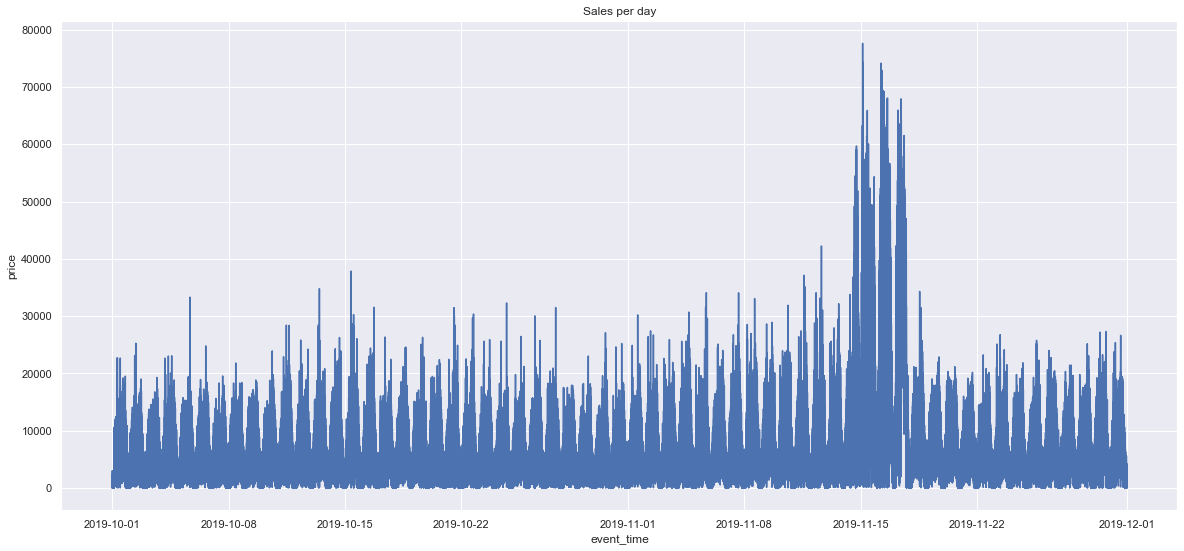

In [39]:
# creating an aggregation
sales_per_purchase_date = view.groupby('event_time', as_index=False).price.sum()
ax = sns.lineplot(x="event_time", y="price", data=sales_per_purchase_date)
ax.set_title('Sales per day')

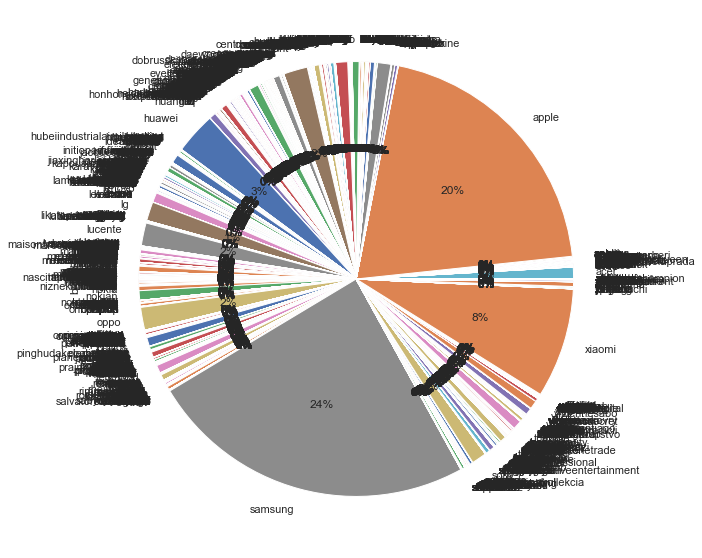

In [40]:
purchase.groupby('brand')['brand'].count().plot(kind='pie', figsize=(30,10), autopct='%1.0f%%')

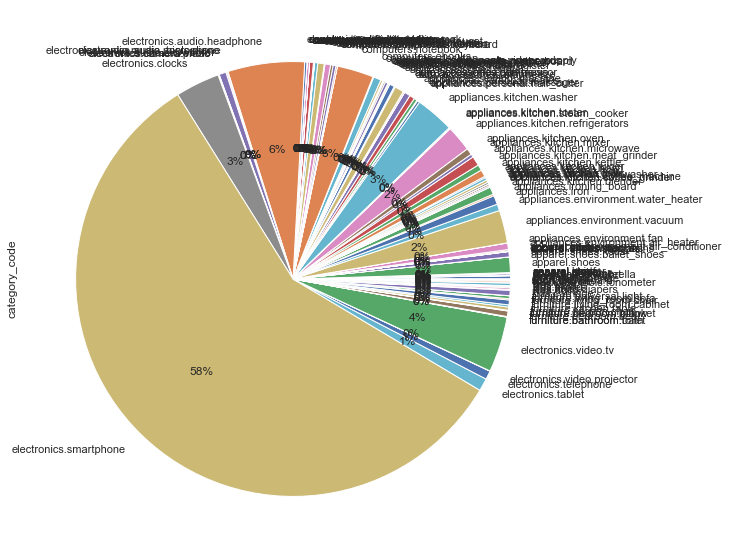

In [41]:
purchase.groupby('category_code')['category_code'].count().plot(kind='pie', figsize=(30,10), autopct='%1.0f%%')

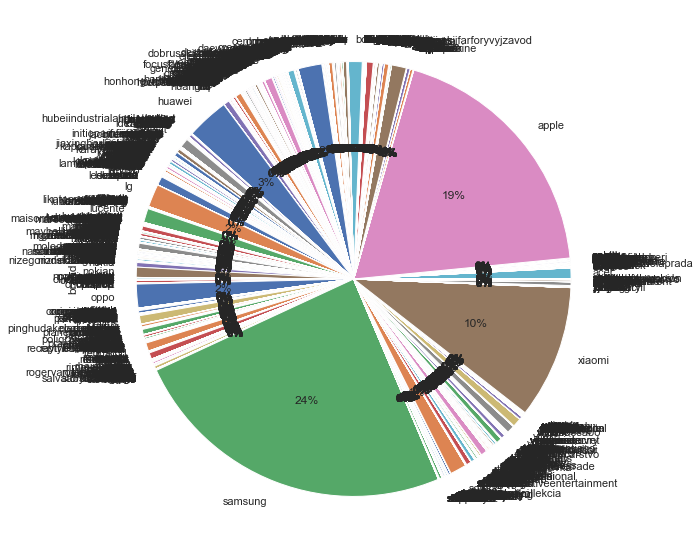

In [42]:
cart.groupby('brand')['brand'].count().plot(kind='pie', figsize=(30,10), autopct='%1.0f%%')

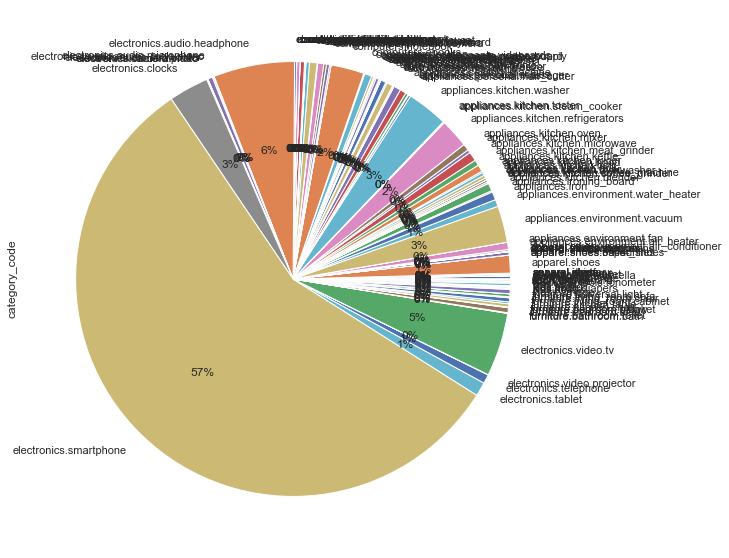

In [43]:
cart.groupby('category_code')['category_code'].count().plot(kind='pie', figsize=(30,10), autopct='%1.0f%%')

Text(0.5, 1.0, 'Price Distribution')

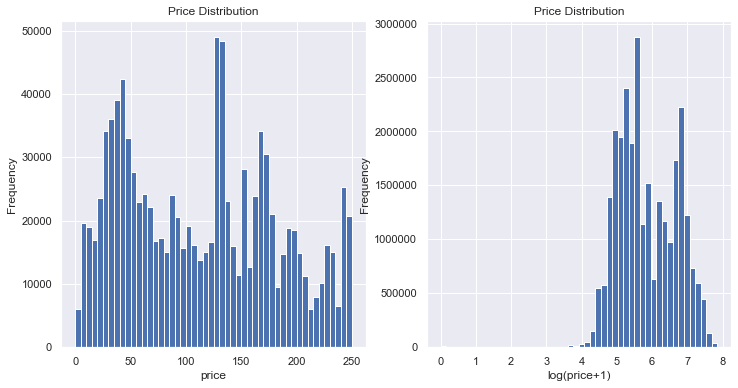

In [44]:
plt.subplot(1, 2, 1)
(purchase['price']).plot.hist(bins=50, figsize=(12, 6), edgecolor = 'white', range = [0, 250])
plt.xlabel('price', fontsize=12)
plt.title('Price Distribution', fontsize=12)
plt.subplot(1, 2, 2)
np.log(electronics_smartphone['price']+1).plot.hist(bins=50, figsize=(12,6), edgecolor='white')
plt.xlabel('log(price+1)', fontsize=12)
plt.title('Price Distribution', fontsize=12)

In [45]:
df.shape

(109950743, 9)

In [30]:
df['user_id'].nunique()

5316649